# **Loan Predication**

## Problem Definition

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Data

The data is downloaded from the Kaggle: https://www.kaggle.com/datasets/ninzaami/loan-predication

In [1]:
# Regular EDA (exploratory Data analysis) and plotting libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Models from Scickit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

### Load Data

In [2]:
df = pd.read_csv('loan.csv',
                 low_memory=False)

# Data Exploration (exploratory data analysis or EDA)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

In [7]:
# Let's see how many samples we have in our dataframe
df.Loan_Status.value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

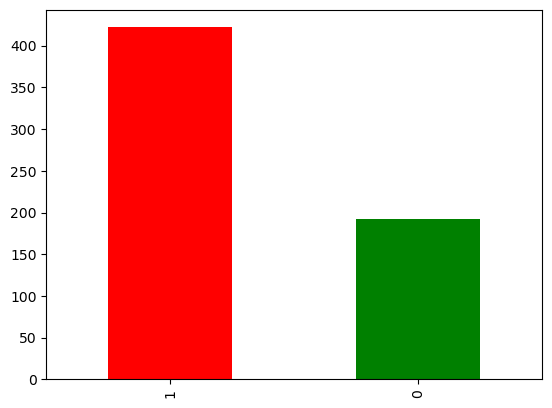

In [8]:
df['Loan_Status'].value_counts().plot(kind='bar', color=['red', 'green']);

## Are there any missing values?

In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

## Converting objects to a binnary data type


In [11]:
df.replace({'Married':{'No': 0, 'Yes': 1}, 'Dependents':{'0':0,'1':1,'2':2,'3+':4},
            'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No': 0, 'Yes': 1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [12]:
df = df.dropna(subset=['Dependents'])

In [13]:
df.Gender.ffill(inplace=True)

In [14]:
df.Married.ffill(inplace=True)

In [15]:
df['Self_Employed'].value_counts()

0.0    487
1.0     80
Name: Self_Employed, dtype: int64

In [16]:
df.Self_Employed.ffill(inplace=True)

In [17]:
df['LoanAmount'].describe()

count    579.000000
mean     146.816926
std       86.343049
min        9.000000
25%      100.000000
50%      128.000000
75%      169.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [18]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [19]:
df['Loan_Amount_Term'].describe()

count    586.000000
mean     341.672355
std       64.874910
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [20]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [21]:
df = df.dropna(subset=['Credit_History'])

In [22]:
df.drop('Loan_ID', axis=1, inplace=True)

In [23]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data visualization

## Education vs Loan Status

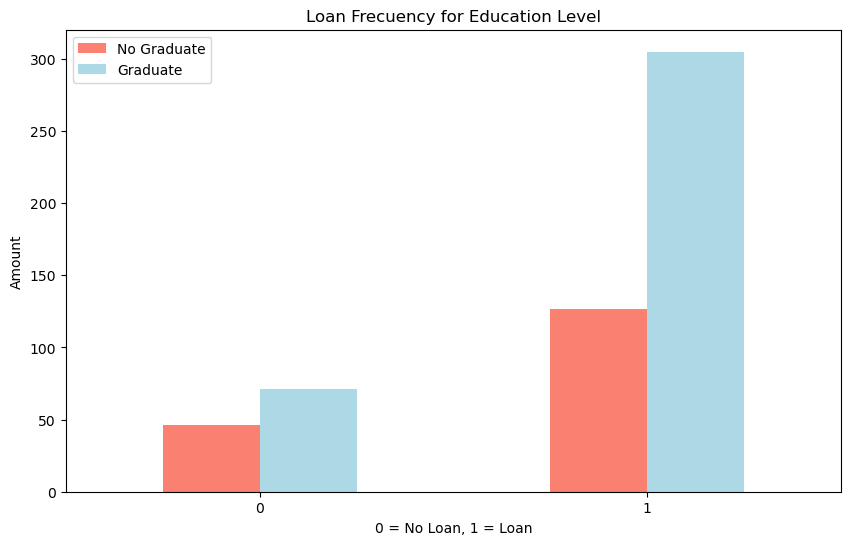

In [24]:
pd.crosstab(df.Education, df.Loan_Status).plot(kind='bar',
                                             figsize=(10,6),
                                             color=['salmon', 'lightblue']);
plt.title('Loan Frecuency for Education Level')
plt.xlabel('0 = No Loan, 1 = Loan')
plt.ylabel('Amount')
plt.legend(['No Graduate', 'Graduate'])
plt.xticks(rotation = 0);

## Propiety Area vs Loan Status

In [25]:
pd.crosstab(df.Property_Area, df.Loan_Status)

Loan_Status,0,1
Property_Area,,
0,64,99
1,47,164
2,62,113


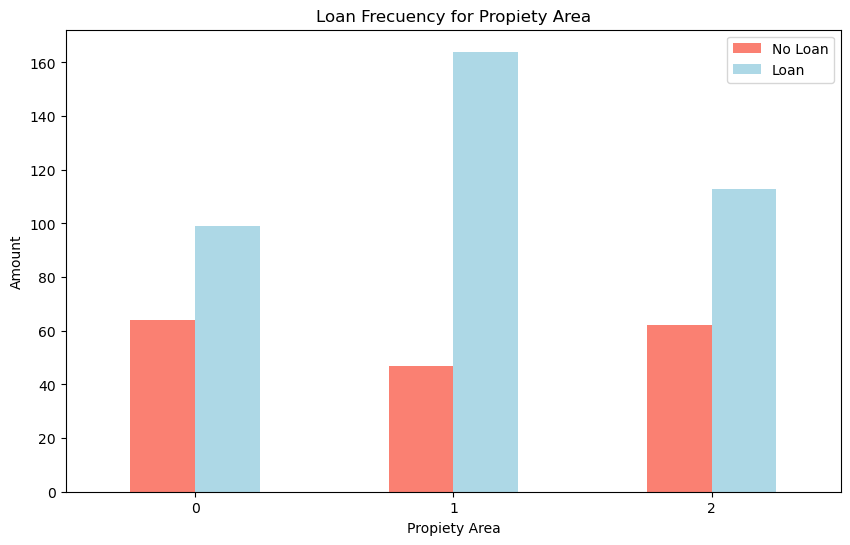

In [26]:
pd.crosstab(df.Property_Area, df.Loan_Status).plot(kind='bar',
                                              figsize=(10,6),
                                              color=['salmon', 'lightblue']);
plt.title('Loan Frecuency for Propiety Area')
plt.xlabel('Propiety Area')
plt.ylabel('Amount')
plt.legend(['No Loan', 'Loan'])
plt.xticks(rotation = 0);

### Save preproceded data 

In [27]:
# Export current DataFrame
df.to_csv('loan_tmp.csv',
           index=False)

# Import preprocessed data
df = pd.read_csv('loan_tmp.csv',
                  low_memory=False)

## Correlation between independent variables

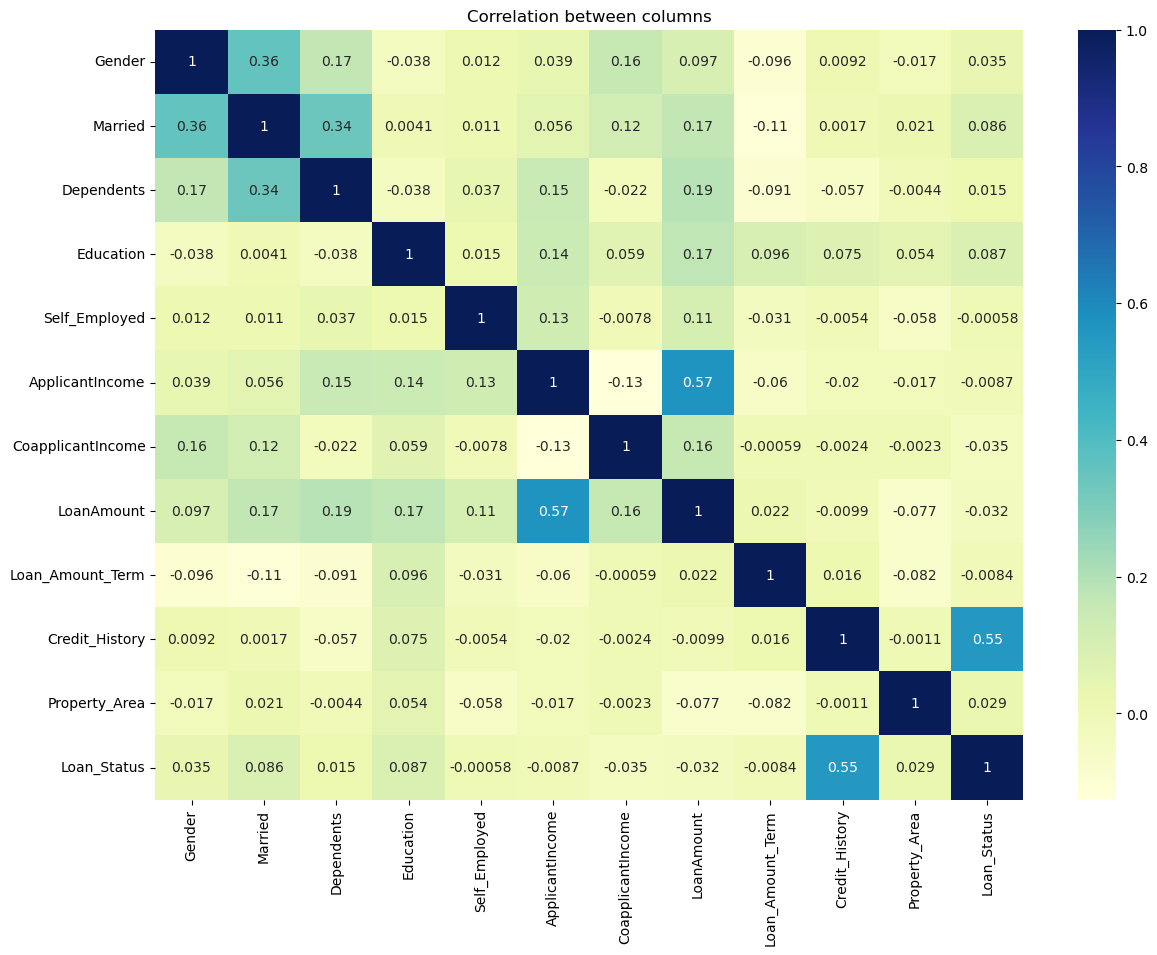

In [28]:
plt.figure(figsize = (14,10))
plt.title('Correlation between columns')
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu");

# Modeling

In [29]:
# Split data into X & y
X = df.drop('Loan_Status', axis=1)

y= df['Loan_Status']

In [30]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.816926,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
544,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0
545,1.0,1.0,4.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0
546,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2
547,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2


In [31]:
y

0      1
1      0
2      1
3      1
4      1
      ..
544    1
545    1
546    1
547    1
548    0
Name: Loan_Status, Length: 549, dtype: int64

In [32]:
print(X)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
544     0.0      0.0         0.0          1            0.0             2900   
545     1.0      1.0         4.0          1            0.0             4106   
546     1.0      1.0         1.0          1            0.0             8072   
547     1.0      1.0         2.0          1            0.0             7583   
548     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

## Standarization

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler()

In [35]:
standardized_data = scaler.transform(X)

In [36]:
print(standardized_data)

[[ 0.47192918 -1.3473621  -0.69829973 ...  0.2867883   0.42502372
   1.24709156]
 [ 0.47192918  0.74219098  0.11391754 ...  0.2867883   0.42502372
  -1.30282749]
 [ 0.47192918  0.74219098 -0.69829973 ...  0.2867883   0.42502372
   1.24709156]
 ...
 [ 0.47192918  0.74219098  0.11391754 ...  0.2867883   0.42502372
   1.24709156]
 [ 0.47192918  0.74219098  0.92613481 ...  0.2867883   0.42502372
   1.24709156]
 [-2.11896201 -1.3473621  -0.69829973 ...  0.2867883  -2.35280987
  -0.02786797]]


## Training and test split

In [37]:
# Random seed for reproducibility
np.random.seed(0)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set

In [38]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
346,1.0,1.0,0.0,0,0.0,3010,3136.0,146.816926,360.0,0.0,2
351,1.0,1.0,2.0,0,0.0,1993,1625.0,113.000000,180.0,1.0,1
38,1.0,0.0,0.0,1,0.0,1800,1213.0,47.000000,360.0,1.0,2
503,1.0,0.0,0.0,0,1.0,5800,0.0,132.000000,360.0,1.0,1
362,0.0,0.0,0.0,1,0.0,4547,0.0,115.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
70,1.0,1.0,4.0,1,1.0,5266,1774.0,187.000000,360.0,1.0,1
277,0.0,0.0,0.0,1,0.0,3762,1666.0,135.000000,360.0,1.0,0
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.000000,360.0,1.0,1
359,1.0,0.0,0.0,1,0.0,2500,20000.0,103.000000,360.0,1.0,1


In [39]:
y_train, len(y_train)

(346    0
 351    1
 38     1
 503    1
 362    1
       ..
 70     1
 277    1
 9      0
 359    1
 192    0
 Name: Loan_Status, Length: 384, dtype: int64,
 384)

## Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results. We'll train it (find the patterns) on the trainning set. And we'll test (use the patterns) on the test set.

* Logistic Regression - LogisticRegression()
* K-Nearest Neighbors - KNeighboursClassifier()
* RandomForest - RandomForestClassifier()

In [40]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=3000),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6,
 'Logistic Regression': 0.806060606060606,
 'Random Forest': 0.7878787878787878}

# Model Comparison

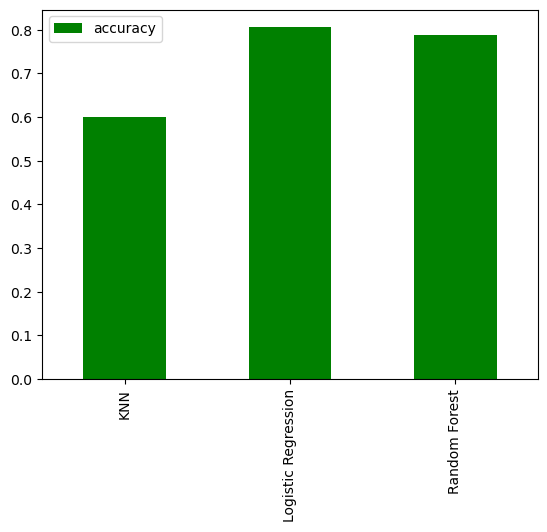

In [42]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color='green');

# Improving our model: Hyperparameter tuning

In [43]:
# Create a list of train & test scores
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 20) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [44]:
train_scores

[1.0,
 0.8229166666666666,
 0.8046875,
 0.7604166666666666,
 0.7578125,
 0.7369791666666666,
 0.7213541666666666,
 0.7161458333333334,
 0.7239583333333334,
 0.7109375,
 0.703125,
 0.7057291666666666,
 0.7057291666666666,
 0.7057291666666666,
 0.7083333333333334,
 0.6953125,
 0.6875,
 0.6901041666666666,
 0.6953125]

In [45]:
test_scores

[0.5515151515151515,
 0.47878787878787876,
 0.5818181818181818,
 0.5454545454545454,
 0.6,
 0.593939393939394,
 0.6363636363636364,
 0.6242424242424243,
 0.6606060606060606,
 0.6181818181818182,
 0.6606060606060606,
 0.6606060606060606,
 0.6424242424242425,
 0.6666666666666666,
 0.6909090909090909,
 0.6787878787878788,
 0.6909090909090909,
 0.6787878787878788,
 0.6909090909090909]

Maximum KNN score on the test data: 69.09%


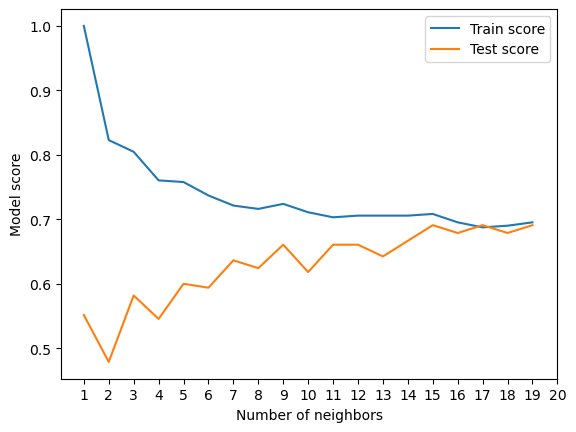

In [46]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Tuning models with with RandomizedSearchCV

In [47]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [48]:
# Tune LogisticRegression

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [49]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [50]:
rs_log_reg.score(X_test, y_test) #quedo igual, habria que tunear mas hyperparameters

0.8

Now we've turned LogisticRegression(), let's do the same for RandomForestClassifier().

In [51]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [52]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [53]:
# Evaluate the randomized searchRandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8121212121212121

In [54]:
model_scores

{'KNN': 0.6,
 'Logistic Regression': 0.806060606060606,
 'Random Forest': 0.7878787878787878}

## Tuning a model with GridSearchCV

In [55]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [56]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [57]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8

# Evaluating our tuned ml classifier, beyond accuracy

* ROC Curve and AUC score
* Confussion matrix
* Clssification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, firt we nedd to make predictions

In [58]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [59]:
y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [60]:
y_test

85     1
438    1
96     1
172    1
134    1
      ..
6      1
8      1
355    1
344    1
213    1
Name: Loan_Status, Length: 165, dtype: int64

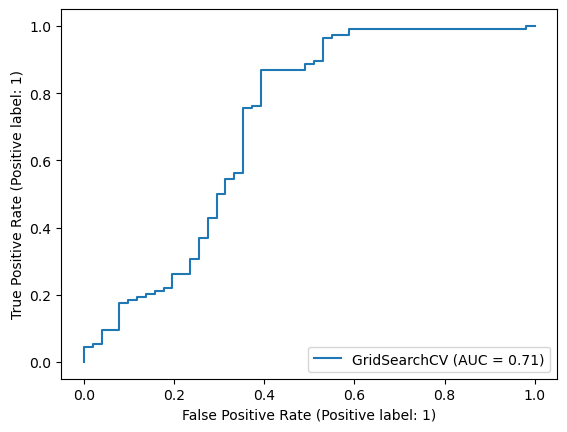

In [61]:
# Plot RCO Curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [62]:
# Confussion Matrix
print(confusion_matrix(y_test, y_preds))

[[ 21  30]
 [  3 111]]


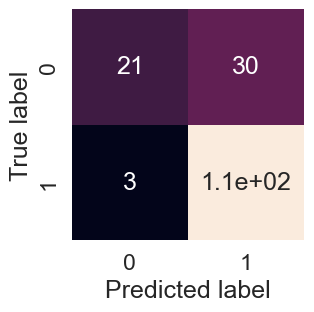

In [63]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [64]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.79      0.97      0.87       114

    accuracy                           0.80       165
   macro avg       0.83      0.69      0.72       165
weighted avg       0.81      0.80      0.77       165



# Calculate Evaluation Metrics using cross-validation

In [65]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [66]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=788.0462815669904,
                         solver="liblinear")

In [67]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.82727273, 0.78181818, 0.77272727, 0.86363636, 0.80733945])

In [68]:
cv_acc.mean()

0.810558798999166

In [69]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # accuracy as scoring
cv_recall = np.mean(cv_recall)
cv_recall

0.978701754385965

In [70]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # accuracy as scoring
cv_precision = np.mean(cv_precision)
cv_precision

0.7939353367960255

In [71]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # accuracy as scoring
cv_f1 = np.mean(cv_f1)
cv_f1

0.8764851241256274

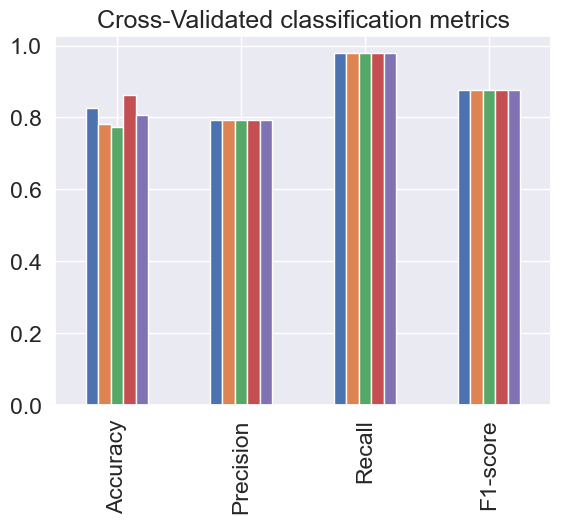

In [72]:
# Visualize cross-validated matrix
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1-score': cv_f1})
                          

cv_metrics.T.plot.bar(title='Cross-Validated classification metrics',
                      legend=False);

In [73]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.2043359717856941,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.2043359717856941, solver='liblinear')

In [74]:
# Check coef_
clf.coef_

array([[ 1.35217366e-01,  2.48469513e-01, -2.17743778e-02,
         4.14856924e-01,  1.66118885e-02, -1.14056717e-05,
        -5.16567666e-05, -2.65798402e-03, -1.27016938e-03,
         2.04324706e+00, -3.41582849e-02]])

In [75]:
# Match coef's of features t columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'Gender': 0.13521736600720402,
 'Married': 0.24846951334430012,
 'Dependents': -0.02177437783803365,
 'Education': 0.4148569237845806,
 'Self_Employed': 0.016611888537213203,
 'ApplicantIncome': -1.1405671706828998e-05,
 'CoapplicantIncome': -5.165676658409791e-05,
 'LoanAmount': -0.0026579840176127107,
 'Loan_Amount_Term': -0.0012701693809763794,
 'Credit_History': 2.0432470589426774,
 'Property_Area': -0.03415828493908935}

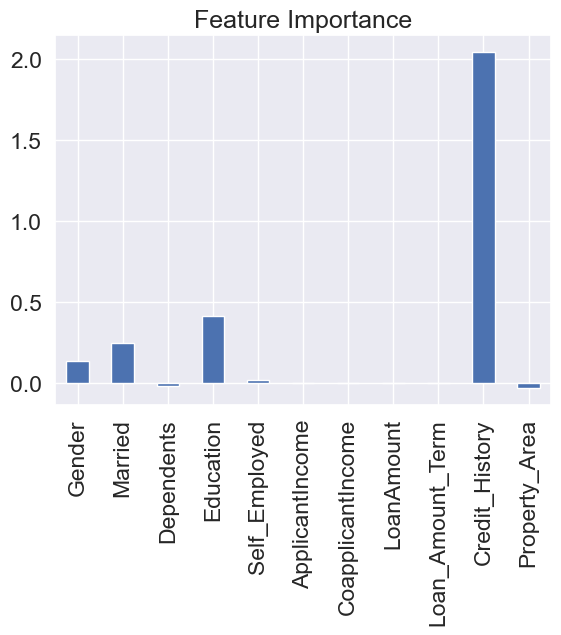

In [76]:
# Visualize feture importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);